A notebook to train the machine-learning models related to the experiments <br>
conducted in the article: "", 
submitted to Journal of Hydrology <br><br>
Date of creation: May 2022

# Imports
<br><hr>

In [50]:
import numpy as np  # version: 1.19.5
import pandas as pd # version: 1.2.4
import matplotlib.pyplot as plt # version: 3.4.2

# sklearn, version: 1.0
from sklearn.ensemble import RandomForestRegressor as RF 

# lightgbm, version: 3.3.1
from lightgbm import LGBMRegressor as LGBM 
from lightgbm import early_stopping

# tensorflow, version: 2.6.0 
import tensorflow as tf 

# Benchmarking experiment
<br><hr><br>
<p>In this section you can train and test ML models using hyperparameters <br>
and input variables that were selected for the benchmarking experiment </p>

## RF and LGBM
<br>
<p>training random forest and light gradient boosting machine</p>

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


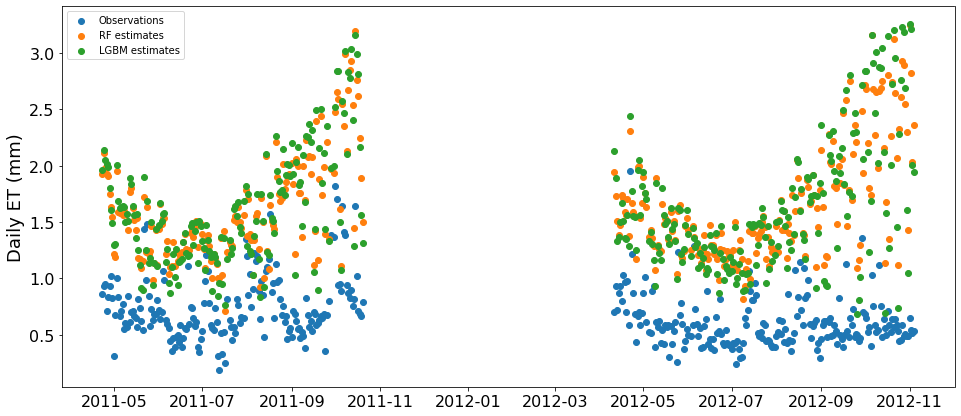

In [143]:
# Step1 --------------*******************------------------*****************

# we need to import the training and test data for the benchmarking experiment
# dimension check: 59303 rows × 20 columns 
training_benchExp = pd.read_csv("training_benchmarkingExperiment.csv",
                                index_col=False) 

# dimension check: 43880 rows × 20 columns
test_benchExp = pd.read_csv("test_benchmarkingExperiment.csv",
                                index_col=False) 

# Step2 --------------*******************------------------*****************

# selected input variables for the benchmarking experiment 
selected_vars = ['Net Radiation (W.m-2)',
       'NDVI',  'Vapor Pressure Deficit (kPa)', 'Specific humidity'
]
target_var = "Evapotranspiration (mm)"

# selected hyperparameters for each of the two models 
rf_params = {
    "n_estimators" : 100,
    "max_features" : 2,
    "max_samples" : 0.01,
    "min_samples_leaf" : 7
}
lgbm_params = {
     "n_estimators" : 100,
    "learning_rate" : 0.05,
    "num_leaves" : 8,
    "min_data_in_leaf" : 50,
    "subsample" : 0.05,
    "feature_fraction" : 0.5  
}

# Step3 --------------*******************------------------*****************
# model instantiation 
seed = 1915 
nj = 4 # number of CPU cores to use 

rf = RF(n_jobs=nj, verbose=0, random_state=seed)
lgbm = LGBM(n_jobs=nj, random_state=seed,
                               subsample_freq=1)
# set parameters for each model 
rf.set_params(**rf_params)
lgbm.set_params(**lgbm_params);

# Step4 --------------*******************------------------*****************

# train the models 
Xtrain = training_benchExp.loc[:, selected_vars].to_numpy()
ytrain = training_benchExp.loc[:, target_var].to_numpy()

rf.fit(Xtrain, ytrain)

early_stopping(15)
lgbm.fit(Xtrain, ytrain);

# Step5 --------------*******************------------------*****************

# estimate ET for a subset of sites in the test set, as an example 
# here you can add the name(s) of the site(s) 
test_site_id = ["AU-Cpr"]

Xtest = (test_benchExp.query(F"site_id in {test_site_id}")
                      .loc[:, selected_vars]
                      .to_numpy()
)
# ET observations
ytest = (test_benchExp.query(F"site_id in {test_site_id}")
                      .loc[:, target_var]
                      .to_numpy()
)
# ET estimations
ytest_estimations_rf = rf.predict(Xtest)
ytest_estimations_lgbm = lgbm.predict(Xtest)

#! now you can use your metrics to compare `ytest_predictions` with `ytest`

# Step6 (optional) --------------*******************------------------*****************

# we can plot the example above 
# get the dates corresponding to test data 
the_dates = (test_benchExp.query(F"site_id in {test_site_id}")
                      .loc[:, "date"]
)
the_dates = pd.to_datetime(the_dates)

# figure 
figure, ax = plt.subplots(
    figsize=(16, 7), # change the size as you see fit
    facecolor="w" # background color for the figure
)
plt.ylabel('Daily ET (mm)', fontsize=18) # setting ylabel for the figure
plt.yticks(fontsize = 16) # font size for the numbers on y axis 
plt.xticks(fontsize = 16) # font size for the dates on x axis 

ax.scatter(the_dates, ytest, label = "Observations")
ax.scatter(the_dates, ytest_estimations_rf, label = "RF estimates")
ax.scatter(the_dates, ytest_estimations_lgbm, label = "LGBM estimates")


plt.legend()
plt.show()

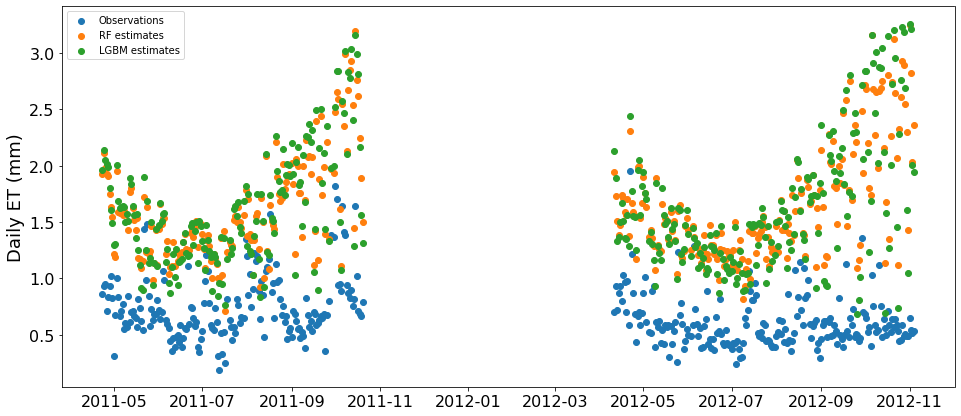

## NN
<br>
<p>training neural networks</p>

Epoch 1/200
2426/2426 [==============================] - 3s 1ms/step - loss: 1.7353 - MAE: 0.9901 - val_loss: 1.7762 - val_MAE: 0.9843
Epoch 2/200
2426/2426 [==============================] - 2s 972us/step - loss: 1.1237 - MAE: 0.8064 - val_loss: 1.7076 - val_MAE: 0.9606
Epoch 3/200
2426/2426 [==============================] - 2s 985us/step - loss: 1.1003 - MAE: 0.7957 - val_loss: 1.7287 - val_MAE: 0.9636
Epoch 4/200
2426/2426 [==============================] - 2s 965us/step - loss: 1.0904 - MAE: 0.7917 - val_loss: 1.7168 - val_MAE: 0.9638
Epoch 5/200
2426/2426 [==============================] - 2s 906us/step - loss: 1.0865 - MAE: 0.7905 - val_loss: 1.7042 - val_MAE: 0.9548
Epoch 6/200
2426/2426 [==============================] - 2s 1ms/step - loss: 1.0812 - MAE: 0.7869 - val_loss: 1.7091 - val_MAE: 0.9564
Epoch 7/200
2426/2426 [==============================] - 2s 955us/step - loss: 1.0896 - MAE: 0.7913 - val_loss: 1.7230 - val_MAE: 0.9638
Epoch 8/200
2426/2426 [======================

2426/2426 [==============================] - 2s 888us/step - loss: 1.0796 - MAE: 0.7870 - val_loss: 1.7053 - val_MAE: 0.9551
Epoch 61/200
2426/2426 [==============================] - 2s 837us/step - loss: 1.0841 - MAE: 0.7891 - val_loss: 1.7062 - val_MAE: 0.9575
Epoch 62/200
2426/2426 [==============================] - 2s 825us/step - loss: 1.0803 - MAE: 0.7860 - val_loss: 1.7022 - val_MAE: 0.9556
Epoch 63/200
2426/2426 [==============================] - 2s 838us/step - loss: 1.0787 - MAE: 0.7862 - val_loss: 1.7120 - val_MAE: 0.9589
Epoch 64/200
2426/2426 [==============================] - 2s 723us/step - loss: 1.0824 - MAE: 0.7877 - val_loss: 1.7060 - val_MAE: 0.9572
Epoch 65/200
2426/2426 [==============================] - 2s 687us/step - loss: 1.0781 - MAE: 0.7865 - val_loss: 1.7055 - val_MAE: 0.9569
Epoch 66/200
2426/2426 [==============================] - 2s 721us/step - loss: 1.0821 - MAE: 0.7868 - val_loss: 1.7066 - val_MAE: 0.9583
Epoch 67/200
2426/2426 [=======================

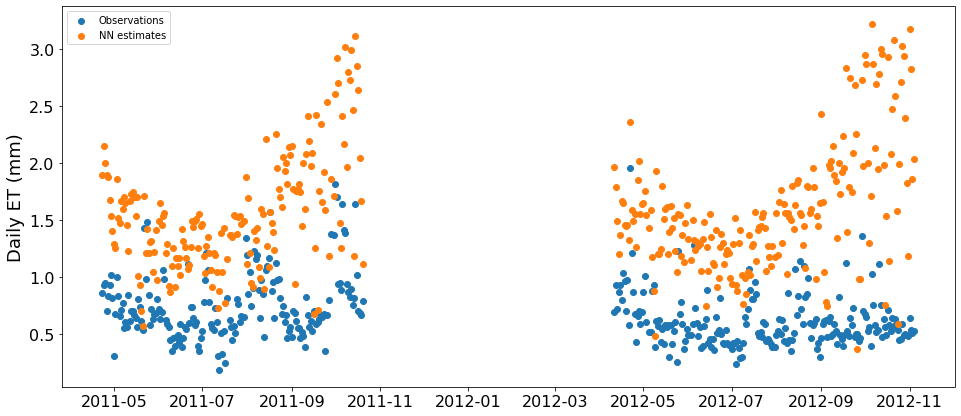

In [144]:
# Step1 --------------*******************------------------*****************

# we need to import the training and test data for the benchmarking experiment
# ... preprocessed for NN 
# dimension check: 59303 rows × 10 columns 
NN_training_benchExp = pd.read_csv("NN_train_BenchmarkingExperiment.csv",
                                index_col=False) 
# dimension check: 43880 rows × 10 columns
NN_test_benchExp = pd.read_csv("NN_test_BenchmarkingExperiment.csv",
                                index_col=False) 

# Step2 --------------*******************------------------*****************

# selected input variables for the benchmarking experiment 
selected_vars = ['Net Radiation (W.m-2)',
       'NDVI',  'Vapor Pressure Deficit (kPa)', 'Specific humidity'
]
target_var = "Evapotranspiration (mm)"

# Step3 --------------*******************------------------*****************

# TensorFlow Functional API 
# input layer, expecting 4 variables 
input_layer = tf.keras.Input(shape = (4,), name = "input_layer")

# hidden layer, of 8 units, with ReLU activation 
hidden_layer1 = tf.keras.layers.Dense(
    units = 8,
    kernel_initializer = tf.keras.initializers.glorot_normal(),
    name = "hidden_layer1"
)(input_layer)
hidden_layer1 = tf.keras.layers.BatchNormalization()(hidden_layer1)
hidden_layer1 = tf.keras.layers.ReLU()(hidden_layer1)
output_layer = tf.keras.layers.Dense(
    units = 1,
    kernel_initializer = tf.keras.initializers.glorot_normal(),
    name = "output_layer"
)(hidden_layer1)

# Model object
nn_benchExp = tf.keras.Model(
    inputs = input_layer,
    outputs = output_layer,
    name = "NN_for_BenchmarkingExperiment")

# model compliation 
opt_method = "Adam" # the weight optimization method 
loss_func = "MSE" # loss function: Mean Square Error
error_metric = "MAE" # evaluation metric 

nn_benchExp.compile(loss = loss_func, metrics = [error_metric],
                 optimizer = opt_method)

# callback
# early stopping based on validation error values
# if Validation MAE didnt improve after 40 epochs, stop the model and 
# restore the best weights 
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_MAE' ,
                 min_delta=1e-3, patience=40, verbose=2, mode='auto',
                 restore_best_weights=True)

batch_size = 2*11 # mini-batch size 
learning_r = 0.001 # initial learning rate 
nr_epochs = 200 # maximum number of epochs 

# Step4 --------------*******************------------------*****************

# fitting the model
Xtrain = NN_training_benchExp.loc[:, selected_vars].to_numpy()
ytrain = NN_training_benchExp.loc[:, target_var].to_numpy()

nn_benchExp.fit(
    x = Xtrain, y = ytrain,
    validation_split = 0.1,
    epochs=nr_epochs, batch_size = batch_size, 
    verbose = 1, callbacks=[early_stop], 
    use_multiprocessing = True)

# Step5 --------------*******************------------------*****************

# estimate ET for a subset of sites in the test set, as an example 
# here you can add the name(s) of the site(s) 
test_site_id = ["AU-Cpr"]

Xtest = (NN_test_benchExp.query(F"site_id in {test_site_id}")
                      .loc[:, selected_vars]
                      .to_numpy()
)
# ET observations
ytest = (NN_test_benchExp.query(F"site_id in {test_site_id}")
                      .loc[:, target_var]
                      .to_numpy()
)
# ET estimations
ytest_estimations_nn = nn_benchExp.predict(Xtest)

#! now you can use your metrics to compare `ytest_predictions` with `ytest`

# Step6 (optional) --------------*******************------------------*****************
# we can plot the example above 
# get the dates corresponding to test data 
the_dates = (test_benchExp.query(F"site_id in {test_site_id}")
                      .loc[:, "date"]
)
the_dates = pd.to_datetime(the_dates)

# figure 
figure, ax = plt.subplots(
    figsize=(16, 7), # change the size as you see fit
    facecolor="w" # background color for the figure
)
plt.ylabel('Daily ET (mm)', fontsize=18) # setting ylabel for the figure
plt.yticks(fontsize = 16) # font size for the numbers on y axis 
plt.xticks(fontsize = 16) # font size for the dates on x axis 

ax.scatter(the_dates, ytest, label = "Observations")
ax.scatter(the_dates, ytest_estimations_nn, label = "NN estimates")


plt.legend()
plt.show()

# Vegetation robustness experiment
<br><hr><br>
<p>In this section you can train and test ML models using hyperparameters <br>
and input variables that were selected for the vegetation robustness experiment </p>

## RF and LGBM
<br>
<p>training random forest and light gradient boosting machine</p>

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


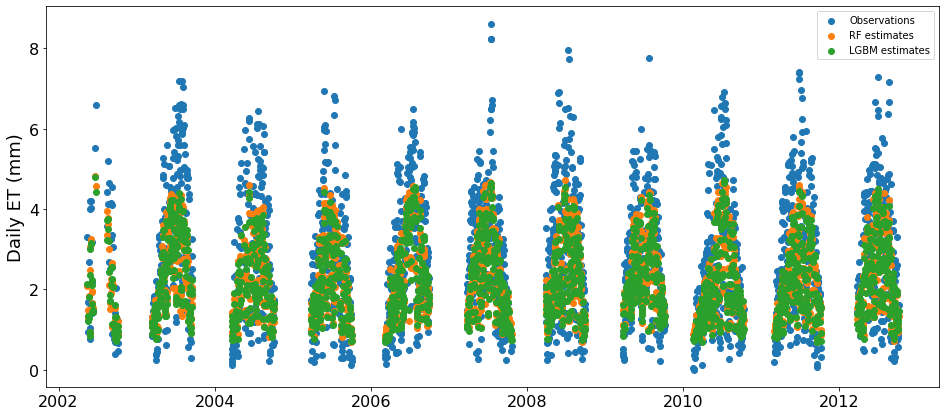

In [142]:
# Step1 --------------*******************------------------*****************

# we need to import the training and test data for the benchmarking experiment
training_VegRobustExp = pd.read_csv("train_VegetationRobustnessExperiment.csv",
                                index_col=False) 

test_VegRobustExp = pd.read_csv("test_VegetationRobustnessExperiment.csv",
                                index_col=False) 

# Step2 --------------*******************------------------*****************

# selected input variables for the benchmarking experiment 
selected_vars = ['Net Radiation (W.m-2)', 'LAI',
       'NDVI',  'Vapor Pressure Deficit (kPa)', 'Atmospheric Pressure (kPa)',
        'Air Temperature (°C)'
]

target_var = "Evapotranspiration (mm)"

# selected hyperparameters for each of the two models 
rf_params = {
    "n_estimators" : 100,
    "max_features" : 3,
    "max_samples" : 0.01,
    "min_samples_leaf" : 5
}

lgbm_params = {
     "n_estimators" : 500,
    "learning_rate" : 0.01,
    "num_leaves" : 8,
    "min_data_in_leaf" : 100,
    "subsample" : 0.1,
    "feature_fraction" : 0.5  
}

# Step3 --------------*******************------------------*****************
# model instantiation 
seed = 1915 
nj = 4 # number of CPU cores to use 

rf = RF(n_jobs=nj, verbose=0, random_state=seed)
lgbm = LGBM(n_jobs=nj, random_state=seed,
                               subsample_freq=1)
# set parameters for each model 
rf.set_params(**rf_params)
lgbm.set_params(**lgbm_params);

# Step4 --------------*******************------------------*****************

# train the models 
Xtrain = training_VegRobustExp.loc[:, selected_vars].to_numpy()
ytrain = training_VegRobustExp.loc[:, target_var].to_numpy()

rf.fit(Xtrain, ytrain)

early_stopping(15)
lgbm.fit(Xtrain, ytrain);

# Step5 --------------*******************------------------*****************

# estimate ET for a subset of sites in the test set, as an example 
# here you can add the name(s) of the site(s) 
test_site_id = ["AT-Neu"]

Xtest = (test_VegRobustExp.query(F"site_id in {test_site_id}")
                      .loc[:, selected_vars]
                      .to_numpy()
)
# ET observations
ytest = (test_VegRobustExp.query(F"site_id in {test_site_id}")
                      .loc[:, target_var]
                      .to_numpy()
)
# ET estimations
ytest_estimations_rf = rf.predict(Xtest)
ytest_estimations_lgbm = lgbm.predict(Xtest)

#! now you can use your metrics to compare `ytest_predictions` with `ytest`

# Step6 (optional) --------------*******************------------------*****************

# we can plot the example above 
# get the dates corresponding to test data 
the_dates = (test_VegRobustExp.query(F"site_id in {test_site_id}")
                      .loc[:, "date"]
)
the_dates = pd.to_datetime(the_dates)

# figure 
figure, ax = plt.subplots(
    figsize=(16, 7), # change the size as you see fit
    facecolor="w" # background color for the figure
)
plt.ylabel('Daily ET (mm)', fontsize=18) # setting ylabel for the figure
plt.yticks(fontsize = 16) # font size for the numbers on y axis 
plt.xticks(fontsize = 16) # font size for the dates on x axis 

ax.scatter(the_dates, ytest, label = "Observations")
ax.scatter(the_dates, ytest_estimations_rf, label = "RF estimates")
ax.scatter(the_dates, ytest_estimations_lgbm, label = "LGBM estimates")


plt.legend()
plt.show()

## NN
<br>
<p>training neural networks</p>

Epoch 1/200
2474/2474 [==============================] - 3s 1ms/step - loss: 1.5499 - MAE: 0.9115 - val_loss: 2.2480 - val_MAE: 1.1622
Epoch 2/200
2474/2474 [==============================] - 2s 1000us/step - loss: 1.0311 - MAE: 0.7532 - val_loss: 2.0331 - val_MAE: 1.0787
Epoch 3/200
2474/2474 [==============================] - 2s 916us/step - loss: 1.0060 - MAE: 0.7412 - val_loss: 1.8908 - val_MAE: 1.0567
Epoch 4/200
2474/2474 [==============================] - 2s 912us/step - loss: 0.9916 - MAE: 0.7361 - val_loss: 1.9459 - val_MAE: 1.0521
Epoch 5/200
2474/2474 [==============================] - 3s 1ms/step - loss: 0.9893 - MAE: 0.7342 - val_loss: 2.0832 - val_MAE: 1.0810
Epoch 6/200
2474/2474 [==============================] - 2s 924us/step - loss: 0.9839 - MAE: 0.7333 - val_loss: 1.8601 - val_MAE: 1.0327
Epoch 7/200
2474/2474 [==============================] - 2s 778us/step - loss: 0.9862 - MAE: 0.7347 - val_loss: 1.9696 - val_MAE: 1.0556
Epoch 8/200
2474/2474 [=====================

Epoch 61/200
2474/2474 [==============================] - 3s 1ms/step - loss: 0.9744 - MAE: 0.7287 - val_loss: 1.9003 - val_MAE: 1.0498
Epoch 62/200
2474/2474 [==============================] - 3s 1ms/step - loss: 0.9701 - MAE: 0.7278 - val_loss: 1.8320 - val_MAE: 1.0275
Epoch 63/200
2474/2474 [==============================] - 3s 1ms/step - loss: 0.9679 - MAE: 0.7254 - val_loss: 1.9185 - val_MAE: 1.0516
Epoch 64/200
2474/2474 [==============================] - 3s 1ms/step - loss: 0.9673 - MAE: 0.7261 - val_loss: 1.9889 - val_MAE: 1.0619
Epoch 65/200
2474/2474 [==============================] - 3s 1ms/step - loss: 0.9742 - MAE: 0.7297 - val_loss: 1.8369 - val_MAE: 1.0357
Epoch 66/200
2474/2474 [==============================] - 3s 1ms/step - loss: 0.9684 - MAE: 0.7260 - val_loss: 1.8501 - val_MAE: 1.0421
Epoch 67/200
2474/2474 [==============================] - 3s 1ms/step - loss: 0.9713 - MAE: 0.7285 - val_loss: 1.8957 - val_MAE: 1.0482
Epoch 68/200
2474/2474 [========================

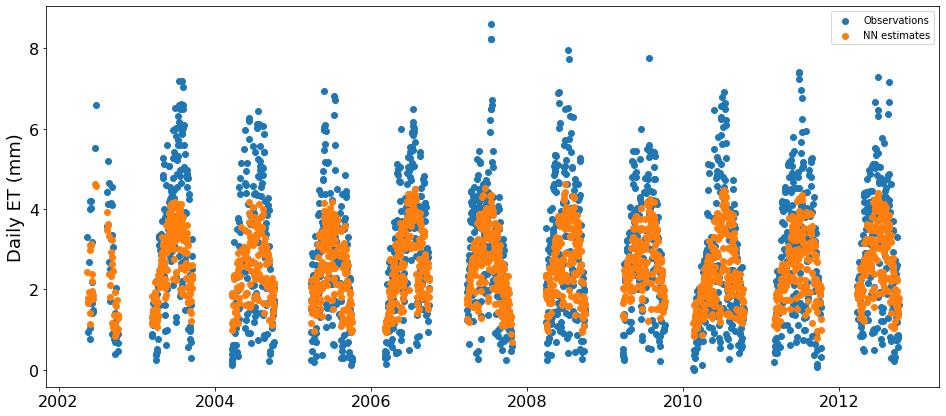

In [146]:
# Step1 --------------*******************------------------*****************

# we need to import the training and test data for the benchmarking experiment
# ... preprocessed for NN 
NN_training_VegRobustExp = pd.read_csv("NN_train_VegetationRobustnessExperiment.csv",
                                index_col=False) 
NN_test_VegRobustExp = pd.read_csv("NN_test_VegetationRobustnessExperiment.csv",
                                index_col=False) 

# Step2 --------------*******************------------------*****************

# selected input variables for the benchmarking experiment 
selected_vars = ['Net Radiation (W.m-2)', 'LAI',
       'NDVI',  'Vapor Pressure Deficit (kPa)', 'Atmospheric Pressure (kPa)',
        'Air Temperature (°C)'
]

target_var = "Evapotranspiration (mm)"

# Step3 --------------*******************------------------*****************

# TensorFlow Functional API 
# input layer, expecting 6 variables 
input_layer = tf.keras.Input(shape = (6,), name = "input_layer")

# hidden layer, of 8 units, with ReLU activation 
hidden_layer1 = tf.keras.layers.Dense(
    units = 8,
    kernel_initializer = tf.keras.initializers.glorot_normal(),
    name = "hidden_layer1"
)(input_layer)
hidden_layer1 = tf.keras.layers.BatchNormalization()(hidden_layer1)
hidden_layer1 = tf.keras.layers.ReLU()(hidden_layer1)
output_layer = tf.keras.layers.Dense(
    units = 1,
    kernel_initializer = tf.keras.initializers.glorot_normal(),
    name = "output_layer"
)(hidden_layer1)

# Model object
nn_VegRobustExp = tf.keras.Model(
    inputs = input_layer,
    outputs = output_layer,
    name = "NN_for_VegetationRobustnessExperiment")

# model compliation 
opt_method = "Adam" # the weight optimization method 
loss_func = "MSE" # loss function: Mean Square Error
error_metric = "MAE" # evaluation metric 

nn_VegRobustExp.compile(loss = loss_func, metrics = [error_metric],
                 optimizer = opt_method)

# callback
# early stopping based on validation error values
# if Validation MAE didnt improve after 40 epochs, stop the model and 
# restore the best weights 
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_MAE' ,
                 min_delta=1e-3, patience=40, verbose=2, mode='auto',
                 restore_best_weights=True)

batch_size = 2*11 # mini-batch size 
learning_r = 0.001 # initial learning rate 
nr_epochs = 200 # maximum number of epochs 

# Step4 --------------*******************------------------*****************

# fitting the model
Xtrain = NN_training_VegRobustExp.loc[:, selected_vars].to_numpy()
ytrain = NN_training_VegRobustExp.loc[:, target_var].to_numpy()

nn_VegRobustExp.fit(
    x = Xtrain, y = ytrain,
    validation_split = 0.1,
    epochs=nr_epochs, batch_size = batch_size, 
    verbose = 1, callbacks=[early_stop], 
    use_multiprocessing = True)

# Step5 --------------*******************------------------*****************

# estimate ET for a subset of sites in the test set, as an example 
# here you can add the name(s) of the site(s) 
test_site_id = ["AT-Neu"]

Xtest = (NN_test_VegRobustExp.query(F"site_id in {test_site_id}")
                      .loc[:, selected_vars]
                      .to_numpy()
)
# ET observations
ytest = (NN_test_VegRobustExp.query(F"site_id in {test_site_id}")
                      .loc[:, target_var]
                      .to_numpy()
)
# ET estimations
ytest_estimations_nn = nn_VegRobustExp.predict(Xtest)

#! now you can use your metrics to compare `ytest_predictions` with `ytest`

# Step6 (optional) --------------*******************------------------*****************
# we can plot the example above 
# get the dates corresponding to test data 
the_dates = (test_VegRobustExp.query(F"site_id in {test_site_id}")
                      .loc[:, "date"]
)
the_dates = pd.to_datetime(the_dates)

# figure 
figure, ax = plt.subplots(
    figsize=(16, 7), # change the size as you see fit
    facecolor="w" # background color for the figure
)
plt.ylabel('Daily ET (mm)', fontsize=18) # setting ylabel for the figure
plt.yticks(fontsize = 16) # font size for the numbers on y axis 
plt.xticks(fontsize = 16) # font size for the dates on x axis 

ax.scatter(the_dates, ytest, label = "Observations")
ax.scatter(the_dates, ytest_estimations_nn, label = "NN estimates")


plt.legend()
plt.show()

# Climate robustness experiment
<br><hr><br>
<p>In this section you can train and test ML models using hyperparameters <br>
and input variables that were selected for the climate robustness experiment </p>

## RF and LGBM
<br>
<p>training random forest and light gradient boosting machine</p>

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4


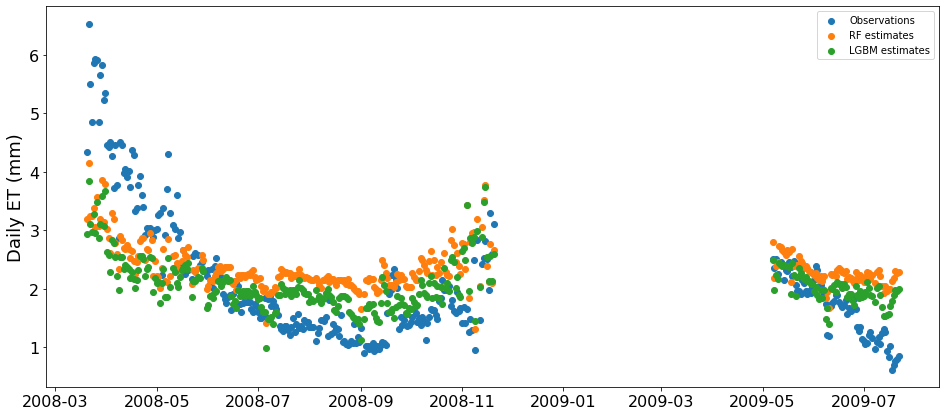

In [149]:
# Step1 --------------*******************------------------*****************

# we need to import the training and test data for the benchmarking experiment
training_ClimRobustExp = pd.read_csv("train_ClimateRobustnessExperiment.csv",
                                index_col=False) 

test_ClimRobustExp = pd.read_csv("test_ClimateRobustnessExperiment.csv",
                                index_col=False) 

# Step2 --------------*******************------------------*****************

# selected input variables for the benchmarking experiment 
selected_vars = ['Net Radiation (W.m-2)', 'LAI',
       'NDVI',  'Vapor Pressure Deficit (kPa)', 'SWC1',
        'Air Temperature (°C)'
]

target_var = "Evapotranspiration (mm)"

# selected hyperparameters for each of the two models 
rf_params = {
    "n_estimators" : 100,
    "max_features" : 3,
    "max_samples" : 0.01,
    "min_samples_leaf" : 11
}

lgbm_params = {
     "n_estimators" : 500,
    "learning_rate" : 0.01,
    "num_leaves" : 6,
    "min_data_in_leaf" : 50,
    "subsample" : 0.05,
    "feature_fraction" : 0.4  
}

# Step3 --------------*******************------------------*****************
# model instantiation 
seed = 1915 
nj = 4 # number of CPU cores to use 

rf = RF(n_jobs=nj, verbose=0, random_state=seed)
lgbm = LGBM(n_jobs=nj, random_state=seed,
                               subsample_freq=1)
# set parameters for each model 
rf.set_params(**rf_params)
lgbm.set_params(**lgbm_params);

# Step4 --------------*******************------------------*****************

# train the models 
Xtrain = training_ClimRobustExp.loc[:, selected_vars].to_numpy()
ytrain = training_ClimRobustExp.loc[:, target_var].to_numpy()

rf.fit(Xtrain, ytrain)

early_stopping(15)
lgbm.fit(Xtrain, ytrain);

# Step5 --------------*******************------------------*****************

# estimate ET for a subset of sites in the test set, as an example 
# here you can add the name(s) of the site(s) 
test_site_id = ["ZM-Mon"]

Xtest = (test_ClimRobustExp.query(F"site_id in {test_site_id}")
                      .loc[:, selected_vars]
                      .to_numpy()
)
# ET observations
ytest = (test_ClimRobustExp.query(F"site_id in {test_site_id}")
                      .loc[:, target_var]
                      .to_numpy()
)
# ET estimations
ytest_estimations_rf = rf.predict(Xtest)
ytest_estimations_lgbm = lgbm.predict(Xtest)

#! now you can use your metrics to compare `ytest_predictions` with `ytest`

# Step6 (optional) --------------*******************------------------*****************

# we can plot the example above 
# get the dates corresponding to test data 
the_dates = (test_ClimRobustExp.query(F"site_id in {test_site_id}")
                      .loc[:, "date"]
)
the_dates = pd.to_datetime(the_dates)

# figure 
figure, ax = plt.subplots(
    figsize=(16, 7), # change the size as you see fit
    facecolor="w" # background color for the figure
)
plt.ylabel('Daily ET (mm)', fontsize=18) # setting ylabel for the figure
plt.yticks(fontsize = 16) # font size for the numbers on y axis 
plt.xticks(fontsize = 16) # font size for the dates on x axis 

ax.scatter(the_dates, ytest, label = "Observations")
ax.scatter(the_dates, ytest_estimations_rf, label = "RF estimates")
ax.scatter(the_dates, ytest_estimations_lgbm, label = "LGBM estimates")


plt.legend()
plt.show()

## NN
<br>
<p>training neural networks</p>

Epoch 1/200
2318/2318 [==============================] - 3s 1ms/step - loss: 1.2753 - MAE: 0.8539 - val_loss: 2.1176 - val_MAE: 1.1053
Epoch 2/200
2318/2318 [==============================] - 2s 949us/step - loss: 0.9404 - MAE: 0.7435 - val_loss: 2.0380 - val_MAE: 1.0785
Epoch 3/200
2318/2318 [==============================] - 2s 1ms/step - loss: 0.9165 - MAE: 0.7342 - val_loss: 2.1052 - val_MAE: 1.0979
Epoch 4/200
2318/2318 [==============================] - 2s 934us/step - loss: 0.9141 - MAE: 0.7322 - val_loss: 2.1353 - val_MAE: 1.1039
Epoch 5/200
2318/2318 [==============================] - 2s 1ms/step - loss: 0.9081 - MAE: 0.7299 - val_loss: 2.0711 - val_MAE: 1.0872
Epoch 6/200
2318/2318 [==============================] - 2s 1ms/step - loss: 0.9096 - MAE: 0.7305 - val_loss: 2.1042 - val_MAE: 1.0964
Epoch 7/200
2318/2318 [==============================] - 2s 1ms/step - loss: 0.9093 - MAE: 0.7309 - val_loss: 2.1367 - val_MAE: 1.1069
Epoch 8/200
2318/2318 [============================

Epoch 61/200
2318/2318 [==============================] - 2s 963us/step - loss: 0.8986 - MAE: 0.7268 - val_loss: 2.0817 - val_MAE: 1.0898
Epoch 62/200
2318/2318 [==============================] - 2s 971us/step - loss: 0.9079 - MAE: 0.7307 - val_loss: 2.1099 - val_MAE: 1.0993
Epoch 63/200
2318/2318 [==============================] - 2s 866us/step - loss: 0.8969 - MAE: 0.7256 - val_loss: 2.0565 - val_MAE: 1.0842
Epoch 64/200
2318/2318 [==============================] - 2s 797us/step - loss: 0.8998 - MAE: 0.7267 - val_loss: 2.0519 - val_MAE: 1.0827
Epoch 65/200
2318/2318 [==============================] - 2s 980us/step - loss: 0.8971 - MAE: 0.7255 - val_loss: 2.1075 - val_MAE: 1.0965
Epoch 66/200
2318/2318 [==============================] - 2s 1ms/step - loss: 0.9036 - MAE: 0.7284 - val_loss: 2.0428 - val_MAE: 1.0795
Epoch 67/200
2318/2318 [==============================] - 3s 1ms/step - loss: 0.9082 - MAE: 0.7288 - val_loss: 2.0846 - val_MAE: 1.0896
Epoch 68/200
2318/2318 [==============

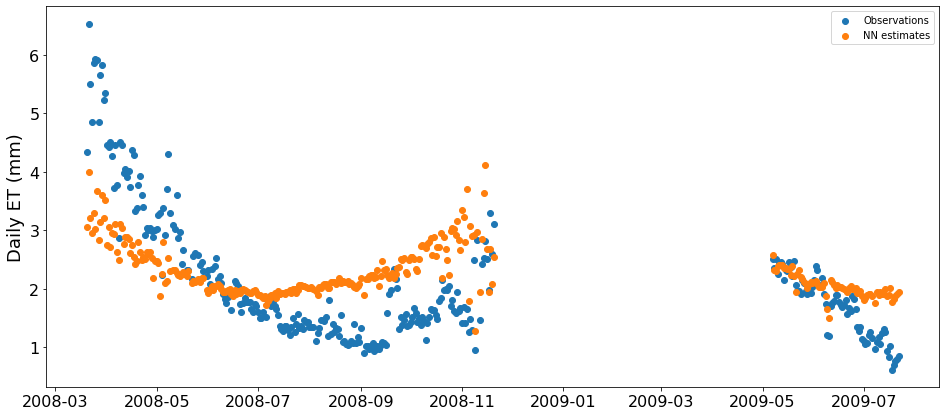

In [151]:
# Step1 --------------*******************------------------*****************

# we need to import the training and test data for the benchmarking experiment
# ... preprocessed for NN 
NN_training_ClimRobustExp = pd.read_csv("NN_train_ClimateRobustnessExperiment.csv",
                                index_col=False) 
NN_test_ClimRobustExp = pd.read_csv("NN_test_ClimateRobustnessExperiment.csv",
                                index_col=False) 

# Step2 --------------*******************------------------*****************

# selected input variables for the benchmarking experiment 
selected_vars = ['Net Radiation (W.m-2)', 'LAI',
       'NDVI',  'Vapor Pressure Deficit (kPa)', 'SWC1',
        'Air Temperature (°C)'
]

target_var = "Evapotranspiration (mm)"

# Step3 --------------*******************------------------*****************

# TensorFlow Functional API 
# input layer, expecting 6 variables 
input_layer = tf.keras.Input(shape = (6,), name = "input_layer")

# hidden layer, of 8 units, with ReLU activation 
hidden_layer1 = tf.keras.layers.Dense(
    units = 8,
    kernel_initializer = tf.keras.initializers.glorot_normal(),
    name = "hidden_layer1"
)(input_layer)
hidden_layer1 = tf.keras.layers.BatchNormalization()(hidden_layer1)
hidden_layer1 = tf.keras.layers.ReLU()(hidden_layer1)
output_layer = tf.keras.layers.Dense(
    units = 1,
    kernel_initializer = tf.keras.initializers.glorot_normal(),
    name = "output_layer"
)(hidden_layer1)

# Model object
nn_ClimRobustExp = tf.keras.Model(
    inputs = input_layer,
    outputs = output_layer,
    name = "NN_for_ClimateRobustnessExperiment")

# model compliation 
opt_method = "Adam" # the weight optimization method 
loss_func = "MSE" # loss function: Mean Square Error
error_metric = "MAE" # evaluation metric 

nn_ClimRobustExp.compile(loss = loss_func, metrics = [error_metric],
                 optimizer = opt_method)

# callback
# early stopping based on validation error values
# if Validation MAE didnt improve after 40 epochs, stop the model and 
# restore the best weights 
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_MAE' ,
                 min_delta=1e-3, patience=40, verbose=2, mode='auto',
                 restore_best_weights=True)

batch_size = 2*11 # mini-batch size 
learning_r = 0.001 # initial learning rate 
nr_epochs = 200 # maximum number of epochs 

# Step4 --------------*******************------------------*****************

# fitting the model
Xtrain = NN_training_ClimRobustExp.loc[:, selected_vars].to_numpy()
ytrain = NN_training_ClimRobustExp.loc[:, target_var].to_numpy()

nn_ClimRobustExp.fit(
    x = Xtrain, y = ytrain,
    validation_split = 0.1,
    epochs=nr_epochs, batch_size = batch_size, 
    verbose = 1, callbacks=[early_stop], 
    use_multiprocessing = True)

# Step5 --------------*******************------------------*****************

# estimate ET for a subset of sites in the test set, as an example 
# here you can add the name(s) of the site(s) 
test_site_id = ["ZM-Mon"]

Xtest = (NN_test_ClimRobustExp.query(F"site_id in {test_site_id}")
                      .loc[:, selected_vars]
                      .to_numpy()
)
# ET observations
ytest = (NN_test_ClimRobustExp.query(F"site_id in {test_site_id}")
                      .loc[:, target_var]
                      .to_numpy()
)
# ET estimations
ytest_estimations_nn = nn_ClimRobustExp.predict(Xtest)

#! now you can use your metrics to compare `ytest_predictions` with `ytest`

# Step6 (optional) --------------*******************------------------*****************
# we can plot the example above 
# get the dates corresponding to test data 
the_dates = (test_ClimRobustExp.query(F"site_id in {test_site_id}")
                      .loc[:, "date"]
)
the_dates = pd.to_datetime(the_dates)

# figure 
figure, ax = plt.subplots(
    figsize=(16, 7), # change the size as you see fit
    facecolor="w" # background color for the figure
)
plt.ylabel('Daily ET (mm)', fontsize=18) # setting ylabel for the figure
plt.yticks(fontsize = 16) # font size for the numbers on y axis 
plt.xticks(fontsize = 16) # font size for the dates on x axis 

ax.scatter(the_dates, ytest, label = "Observations")
ax.scatter(the_dates, ytest_estimations_nn, label = "NN estimates")


plt.legend()
plt.show()

# Temporal split experiment
<br><hr><br>
<p>In this section you can train and test ML models using hyperparameters <br>
and input variables that were selected for the temporal split experiment </p>

## RF and LGBM
<br>
<p>training random forest and light gradient boosting machine</p>

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


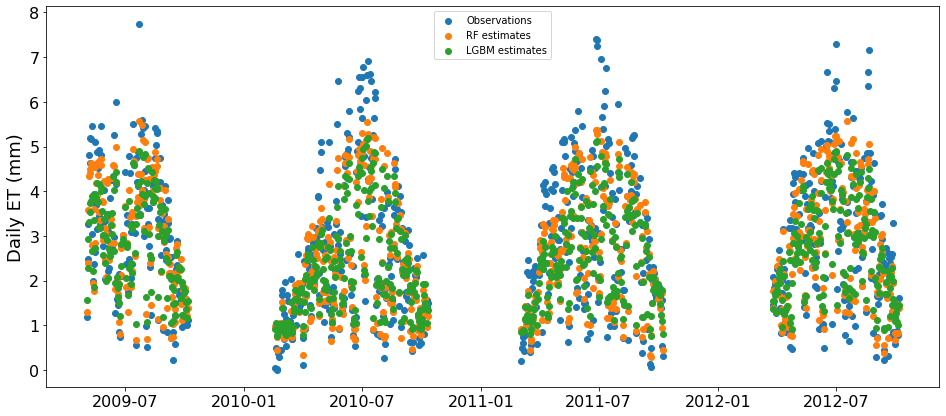

In [156]:
# Step1 --------------*******************------------------*****************

# we need to import the training and test data for the benchmarking experiment
training_TemporalSplitExp = pd.read_csv("train_TemporalSplitExperiment.csv",
                                index_col=False) 

test_TemporalSplitExp = pd.read_csv("test_TemporalSplitExperiment.csv",
                                index_col=False) 

# Step2 --------------*******************------------------*****************

# selected input variables for the benchmarking experiment 
selected_vars = ['Net Radiation (W.m-2)', 'Specific humidity', 'clay',
                 'Air Temperature (°C)', "SWC1", 'Atmospheric Pressure (kPa)',
                 "NDVI", 'Relative Humidity (%)', 'Vapor Pressure Deficit (kPa)',
                 "LAI", '2m WindSpeed (m.s-1)', "silt"
]

target_var = "Evapotranspiration (mm)"

# selected hyperparameters for each of the two models 
rf_params = {
    "n_estimators" : 100,
    "max_features" : 7,
    "max_samples" : 0.5,
    "min_samples_leaf" : 7
}

lgbm_params = {
     "n_estimators" : 500,
    "learning_rate" : 0.01,
    "num_leaves" : 12,
    "min_data_in_leaf" : 30,
    "subsample" : 0.2,
    "feature_fraction" : 0.8  
}

# Step3 --------------*******************------------------*****************
# model instantiation 
seed = 1915 
nj = 4 # number of CPU cores to use 

rf = RF(n_jobs=nj, verbose=0, random_state=seed)
lgbm = LGBM(n_jobs=nj, random_state=seed,
                               subsample_freq=1)
# set parameters for each model 
rf.set_params(**rf_params)
lgbm.set_params(**lgbm_params);

# Step4 --------------*******************------------------*****************

# train the models 
Xtrain = training_TemporalSplitExp.loc[:, selected_vars].to_numpy()
ytrain = training_TemporalSplitExp.loc[:, target_var].to_numpy()

rf.fit(Xtrain, ytrain)

early_stopping(15)
lgbm.fit(Xtrain, ytrain);

# Step5 --------------*******************------------------*****************

# estimate ET for a subset of sites in the test set, as an example 
# here you can add the name(s) of the site(s) 
test_site_id = ["AT-Neu"]

Xtest = (test_TemporalSplitExp.query(F"site_id in {test_site_id}")
                      .loc[:, selected_vars]
                      .to_numpy()
)
# ET observations
ytest = (test_TemporalSplitExp.query(F"site_id in {test_site_id}")
                      .loc[:, target_var]
                      .to_numpy()
)
# ET estimations
ytest_estimations_rf = rf.predict(Xtest)
ytest_estimations_lgbm = lgbm.predict(Xtest)

#! now you can use your metrics to compare `ytest_predictions` with `ytest`

# Step6 (optional) --------------*******************------------------*****************

# we can plot the example above 
# get the dates corresponding to test data 
the_dates = (test_TemporalSplitExp.query(F"site_id in {test_site_id}")
                      .loc[:, "date"]
)
the_dates = pd.to_datetime(the_dates)

# figure 
figure, ax = plt.subplots(
    figsize=(16, 7), # change the size as you see fit
    facecolor="w" # background color for the figure
)
plt.ylabel('Daily ET (mm)', fontsize=18) # setting ylabel for the figure
plt.yticks(fontsize = 16) # font size for the numbers on y axis 
plt.xticks(fontsize = 16) # font size for the dates on x axis 

ax.scatter(the_dates, ytest, label = "Observations")
ax.scatter(the_dates, ytest_estimations_rf, label = "RF estimates")
ax.scatter(the_dates, ytest_estimations_lgbm, label = "LGBM estimates")


plt.legend()
plt.show()

## NN
<br>
<p>training neural networks</p>

Epoch 1/200
2533/2533 [==============================] - 3s 1ms/step - loss: 1.0262 - MAE: 0.7653 - val_loss: 2.1403 - val_MAE: 1.0612
Epoch 2/200
2533/2533 [==============================] - 3s 1ms/step - loss: 0.8964 - MAE: 0.7149 - val_loss: 1.9723 - val_MAE: 1.0320
Epoch 3/200
2533/2533 [==============================] - 3s 1ms/step - loss: 0.8652 - MAE: 0.7027 - val_loss: 2.0771 - val_MAE: 1.0591
Epoch 4/200
2533/2533 [==============================] - 3s 1ms/step - loss: 0.8464 - MAE: 0.6953 - val_loss: 1.7980 - val_MAE: 0.9970
Epoch 5/200
2533/2533 [==============================] - 3s 1ms/step - loss: 0.8308 - MAE: 0.6888 - val_loss: 1.8090 - val_MAE: 0.9935
Epoch 6/200
2533/2533 [==============================] - 3s 1ms/step - loss: 0.8249 - MAE: 0.6846 - val_loss: 1.8768 - val_MAE: 1.0119
Epoch 7/200
2533/2533 [==============================] - 3s 1ms/step - loss: 0.8160 - MAE: 0.6819 - val_loss: 1.8607 - val_MAE: 1.0046
Epoch 8/200
2533/2533 [==============================] 

2533/2533 [==============================] - 3s 1ms/step - loss: 0.7313 - MAE: 0.6445 - val_loss: 1.8863 - val_MAE: 1.0328
Epoch 62/200
2533/2533 [==============================] - 3s 1ms/step - loss: 0.7269 - MAE: 0.6415 - val_loss: 1.6126 - val_MAE: 0.9463
Epoch 63/200
2533/2533 [==============================] - 3s 1ms/step - loss: 0.7311 - MAE: 0.6441 - val_loss: 1.7813 - val_MAE: 1.0003
Epoch 64/200
2533/2533 [==============================] - 3s 1ms/step - loss: 0.7278 - MAE: 0.6411 - val_loss: 1.6927 - val_MAE: 0.9786
Epoch 65/200
2533/2533 [==============================] - 3s 1ms/step - loss: 0.7270 - MAE: 0.6420 - val_loss: 1.8634 - val_MAE: 1.0190
Epoch 66/200
2533/2533 [==============================] - 3s 1ms/step - loss: 0.7254 - MAE: 0.6405 - val_loss: 1.6838 - val_MAE: 0.9678
Epoch 67/200
2533/2533 [==============================] - 3s 1ms/step - loss: 0.7231 - MAE: 0.6405 - val_loss: 1.6496 - val_MAE: 0.9642
Epoch 68/200
2533/2533 [==============================] - 2s 

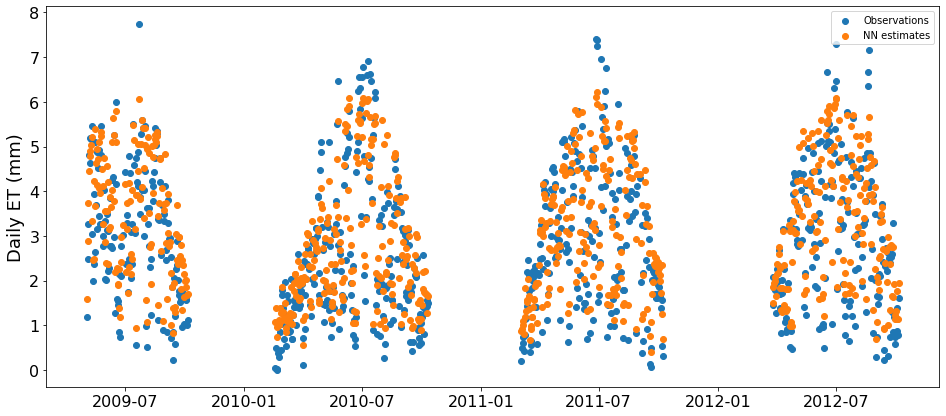

In [159]:
# Step1 --------------*******************------------------*****************

# we need to import the training and test data for the benchmarking experiment
# ... preprocessed for NN 
NN_training_TemporalSplitExp = pd.read_csv("NN_train_TemporalSplitExperiment.csv",
                                index_col=False) 
NN_test_TemporalSplitExp = pd.read_csv("NN_test_TemporalSplitExperiment.csv",
                                index_col=False) 

# Step2 --------------*******************------------------*****************

# selected input variables for the benchmarking experiment 
selected_vars = ['Net Radiation (W.m-2)', 'der_specH', 'clay',
                 'Air Temperature (°C)', "SWC1", 'Atmospheric Pressure (kPa)',
                 "NDVI", 'Relative Humidity (%)', 'Vapor Pressure Deficit (kPa)',
                 "LAI", 'windspeed2m_ms', "silt"
]

target_var = "Evapotranspiration (mm)"

# Step3 --------------*******************------------------*****************

# TensorFlow Functional API 
# input layer, expecting 12 variables 
input_layer = tf.keras.Input(shape = (12,), name = "input_layer")

# hidden layer, of 256 units, with ReLU activation 
hidden_layer1 = tf.keras.layers.Dense(
    units = 256,
    kernel_initializer = tf.keras.initializers.glorot_normal(),
    name = "hidden_layer1"
)(input_layer)
hidden_layer1 = tf.keras.layers.BatchNormalization()(hidden_layer1)
hidden_layer1 = tf.keras.layers.ReLU()(hidden_layer1)
output_layer = tf.keras.layers.Dense(
    units = 1,
    kernel_initializer = tf.keras.initializers.glorot_normal(),
    name = "output_layer"
)(hidden_layer1)

# Model object
nn_TemporalSplitExp = tf.keras.Model(
    inputs = input_layer,
    outputs = output_layer,
    name = "NN_for_TemporalSplitExperiment")

# model compliation 
opt_method = "Adam" # the weight optimization method 
loss_func = "MSE" # loss function: Mean Square Error
error_metric = "MAE" # evaluation metric 

nn_TemporalSplitExp.compile(loss = loss_func, metrics = [error_metric],
                 optimizer = opt_method)

# callback
# early stopping based on validation error values
# if Validation MAE didnt improve after 40 epochs, stop the model and 
# restore the best weights 
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_MAE' ,
                 min_delta=1e-3, patience=40, verbose=2, mode='auto',
                 restore_best_weights=True)

batch_size = 2*11 # mini-batch size 
learning_r = 0.001 # initial learning rate 
nr_epochs = 200 # maximum number of epochs 

# Step4 --------------*******************------------------*****************

# fitting the model
Xtrain = NN_training_TemporalSplitExp.loc[:, selected_vars].to_numpy()
ytrain = NN_training_TemporalSplitExp.loc[:, target_var].to_numpy()

nn_TemporalSplitExp.fit(
    x = Xtrain, y = ytrain,
    validation_split = 0.1,
    epochs=nr_epochs, batch_size = batch_size, 
    verbose = 1, callbacks=[early_stop], 
    use_multiprocessing = True)

# Step5 --------------*******************------------------*****************

# estimate ET for a subset of sites in the test set, as an example 
# here you can add the name(s) of the site(s) 
test_site_id = ["AT-Neu"]

Xtest = (NN_test_TemporalSplitExp.query(F"site_id in {test_site_id}")
                      .loc[:, selected_vars]
                      .to_numpy()
)
# ET observations
ytest = (NN_test_TemporalSplitExp.query(F"site_id in {test_site_id}")
                      .loc[:, target_var]
                      .to_numpy()
)
# ET estimations
ytest_estimations_nn = nn_TemporalSplitExp.predict(Xtest)

#! now you can use your metrics to compare `ytest_predictions` with `ytest`

# Step6 (optional) --------------*******************------------------*****************
# we can plot the example above 
# get the dates corresponding to test data 
the_dates = (test_TemporalSplitExp.query(F"site_id in {test_site_id}")
                      .loc[:, "date"]
)
the_dates = pd.to_datetime(the_dates)

# figure 
figure, ax = plt.subplots(
    figsize=(16, 7), # change the size as you see fit
    facecolor="w" # background color for the figure
)
plt.ylabel('Daily ET (mm)', fontsize=18) # setting ylabel for the figure
plt.yticks(fontsize = 16) # font size for the numbers on y axis 
plt.xticks(fontsize = 16) # font size for the dates on x axis 

ax.scatter(the_dates, ytest, label = "Observations")
ax.scatter(the_dates, ytest_estimations_nn, label = "NN estimates")


plt.legend()
plt.show()

In [154]:
nn_src = "/Volumes/GoogleDrive/My Drive/Papers/PhD_fluxnet/results/saved_NN/mix_model.h"
nn1 = tf.keras.models.load_model(nn_src)
nn1.summary() 

Model: "toy_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_123 (InputLayer)       [(None, 12)]              0         
_________________________________________________________________
dense_230 (Dense)            (None, 256)               3328      
_________________________________________________________________
batch_normalization_109 (Bat (None, 256)               1024      
_________________________________________________________________
re_lu_115 (ReLU)             (None, 256)               0         
_________________________________________________________________
dense_231 (Dense)            (None, 1)                 257       
Total params: 4,609
Trainable params: 4,097
Non-trainable params: 512
_________________________________________________________________
